In [1]:
# !{sys.executable} -m pip install spectral
# !{sys.executable} -m pip install wxpython
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install segmentation_models
# !{sys.executable} -m pip install opencv-python

import tensorflow as tf
from tensorflow import keras
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)
sm.set_framework('tf.keras')
sm.framework()

path_train_images_RGB ="C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\IOP6_Train_RGB_Images"
path_mask_labels = "C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\IOP6_Train_Mask_Label"


Segmentation Models: using `keras` framework.


In [2]:
#Capture training image info as a list
train_images = []

for directory_path in glob.glob(path_train_images_RGB):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)

#Convert list to array for machine learning processing        
train_images = np.array(train_images)

#Capture mask/label info as a list
train_masks = [] 
for directory_path in glob.glob(path_mask_labels):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        train_masks.append(mask)
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

#Use customary x_train and y_train variables
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3) #May not be necessary.. verify 


In [ ]:
# started training at 10:58 pm 2/2
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[sm.metrics.iou_score])

print(model.summary())


history=model.fit(x_train, 
          y_train,
          batch_size=8, 
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val))



accuracy = model.evaluate(x_val, y_val)
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.save('segModel_10ep8batch42rs.h5')

# To do: Model evaluation
# k-fold - scikit 


In [ ]:
# testing:
from tensorflow import keras
model = keras.models.load_model('segModel_1ep8batch42rs.h5', compile=False)
#Test on a different image
#READ EXTERNAL IMAGE...
# test_img = cv2.imread('C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\Training Data\\IOP6_RGB_Images\\tripod_canopy_2020_211013_153018_15ms.jpg', cv2.IMREAD_COLOR)  # Fail    
# test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.imread('C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\Training Data\\IOP6_RGB_Images\\tripod_canopy_2020_211013_153018_15ms.jpg', cv2.IMREAD_COLOR)

test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
# test_img1 = np.array(test_img).astype(np.float32)
prediction = model.predict(test_img)

#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
# plt.imsave('membrane/test0_segmented.jpg', prediction_image, cmap='gray')

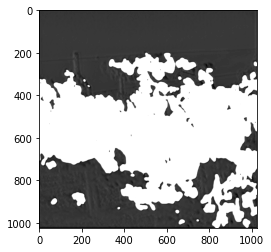

In [42]:
# testing:
from tensorflow import keras
# Rename to load your model..
model = keras.models.load_model('segModel_12ep.h5', compile=False)
#Test on a different image
#READ EXTERNAL IMAGE...
# test_img = cv2.imread('C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\Training Data\\IOP6_RGB_Images\\tripod_canopy_2020_211013_153018_15ms.jpg', cv2.IMREAD_COLOR)  # Fail    
# test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.imread('C:\\Users\\15593\\Documents\\repos\\hyperspectral\\TripodAnalysis\\SegNet\\Training Data\\IOP6_RGB_Images\\tripod_canopy_2020_211013_153018_15ms.jpg', cv2.IMREAD_COLOR)

test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)
# test_img1 = np.array(test_img).astype(np.float32)
prediction = model.predict(test_img)

#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
# plt.imsave('membrane/test0_segmented.jpg', prediction_image, cmap='gray')